<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(0)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,77.493350,43.471189,0.619996,131.584534,131.168199,0.416334
1,0.0,1.0,91.836721,66.187383,-2.406035,165.618069,167.938955,-2.320886
2,0.0,2.0,43.398567,38.309032,1.139236,92.846835,91.946816,0.900019
3,0.0,3.0,73.960630,22.781469,0.259126,107.001226,107.218103,-0.216878
4,0.0,4.0,98.540837,89.850536,-1.016980,197.374393,197.997339,-0.622946
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,46.138603,35.164769,-0.591399,90.711973,91.600067,-0.888095
19996,999.0,16.0,73.135408,86.171748,-0.092377,169.214779,169.252234,-0.037456
19997,999.0,17.0,82.400084,40.066726,2.392244,134.859054,132.999406,1.859648
19998,999.0,18.0,65.243162,88.001906,1.696142,164.941210,163.106549,1.834661


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    77.493350  43.471189  0.619996  131.584534  131.168199  0.416334
      1.0    91.836721  66.187383 -2.406035  165.618069  167.938955 -2.320886
      2.0    43.398567  38.309032  1.139236   92.846835   91.946816  0.900019
      3.0    73.960630  22.781469  0.259126  107.001226  107.218103 -0.216878
      4.0    98.540837  89.850536 -1.016980  197.374393  197.997339 -0.622946
...                ...        ...       ...         ...         ...       ...
999.0 15.0   46.138603  35.164769 -0.591399   90.711973   91.600067 -0.888095
      16.0   73.135408  86.171748 -0.092377  169.214779  169.252234 -0.037456
      17.0   82.400084  40.066726  2.392244  134.859054  132.999406  1.859648
      18.0   65.243162  88.001906  1.696142  164.941210  163.106549  1.834661
      19.0   73.974682  52.585818 -0.537206  136.023293  136.886224 -0.862930

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    77.493350  43.471189  0.619996  131.584534  131.168199  0.416334
      1.0    91.836721  66.187383 -2.406035  165.618069  167.938955 -2.320886
      2.0    43.398567  38.309032  1.139236   92.846835   91.946816  0.900019
      3.0    73.960630  22.781469  0.259126  107.001226  107.218103 -0.216878
      4.0    98.540837  89.850536 -1.016980  197.374393  197.997339 -0.622946
...                ...        ...       ...         ...         ...       ...
999.0 15.0   46.138603  35.164769 -0.591399   90.711973   91.600067 -0.888095
      16.0   73.135408  86.171748 -0.092377  169.214779  169.252234 -0.037456
      17.0   82.400084  40.066726  2.392244  134.859054  132.999406  1.859648
      18.0   65.243162  88.001906  1.696142  164.941210  163.106549  1.834661
      19.0   73.974682  52.585818 -0.537206  136.023293  136.886224 -0.862930

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,77.493350,43.471189,0.619996,131.584534,131.168199,0.416334
1,0.0,1.0,91.836721,66.187383,-2.406035,165.618069,167.938955,-2.320886
2,0.0,2.0,43.398567,38.309032,1.139236,92.846835,91.946816,0.900019
3,0.0,3.0,73.960630,22.781469,0.259126,107.001226,107.218103,-0.216878
4,0.0,4.0,98.540837,89.850536,-1.016980,197.374393,197.997339,-0.622946
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,46.138603,35.164769,-0.591399,90.711973,91.600067,-0.888095
19996,999.0,16.0,73.135408,86.171748,-0.092377,169.214779,169.252234,-0.037456
19997,999.0,17.0,82.400084,40.066726,2.392244,134.859054,132.999406,1.859648
19998,999.0,18.0,65.243162,88.001906,1.696142,164.941210,163.106549,1.834661


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    77.493350  43.471189  0.619996  131.584534  131.168199  0.416334
      1.0    91.836721  66.187383 -2.406035  165.618069  167.938955 -2.320886
      2.0    43.398567  38.309032  1.139236   92.846835   91.946816  0.900019
      3.0    73.960630  22.781469  0.259126  107.001226  107.218103 -0.216878
      4.0    98.540837  89.850536 -1.016980  197.374393  197.997339 -0.622946
...                ...        ...       ...         ...         ...       ...
999.0 15.0   46.138603  35.164769 -0.591399   90.711973   91.600067 -0.888095
      16.0   73.135408  86.171748 -0.092377  169.214779  169.252234 -0.037456
      17.0   82.400084  40.066726  2.392244  134.859054  132.999406  1.859648
      18.0   65.243162  88.001906  1.696142  164.941210  163.106549  1.834661
      19.0   73.974682  52.585818 -0.537206  136.023293  136.886224 -0.862930

[20000 rows x 6 columns]

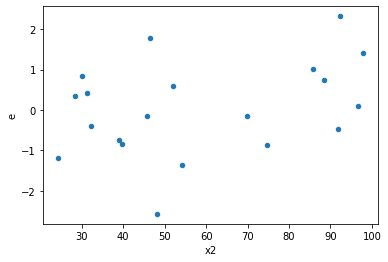

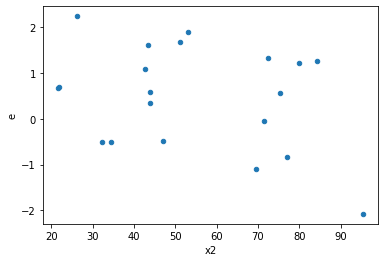

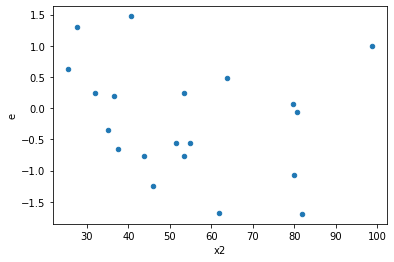

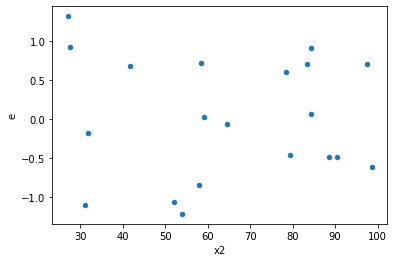

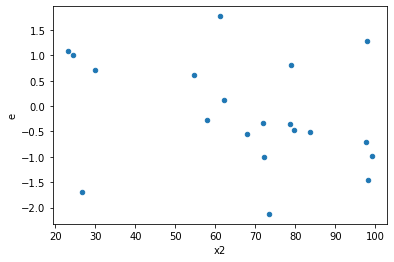

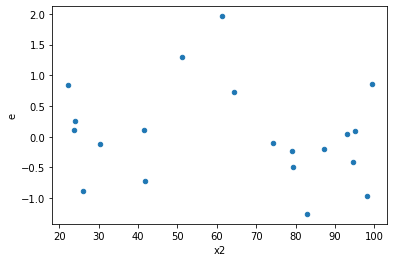

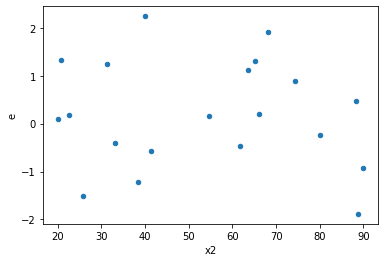

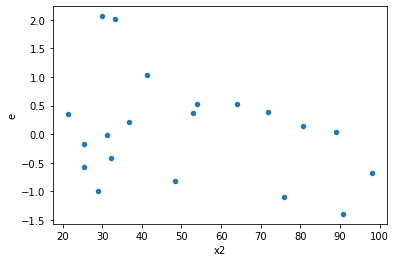

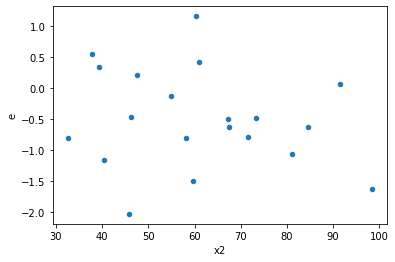

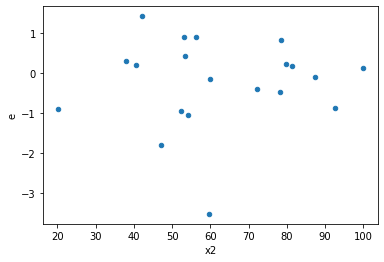

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,8.0,8.0,9.66811390876782,14.506094721448259,1.2085142385959775,1.8132618401810323,1.5004058556129516,0.5793327086480322,0.7103336456759839,0.2896663543240161,Reject005=1 : Homoscedasticity
4.0,6.0,10.0,0.3829195324950901,9.127240107364484,0.06381992208251501,0.9127240107364484,14.30155319770456,0.0004337957553113281,0.9997831021223443,0.00021689787765566404,Reject005=0 : Heteroscedasticity
5.0,11.0,5.0,4.193624570709192,2.8215898417503795,0.3812385973371992,0.5643179683500759,1.4802225490588141,0.6983366038546652,0.6508316980726674,0.3491683019273326,Reject005=1 : Homoscedasticity
8.0,6.0,10.0,6.95588105533642,11.75394853067748,1.1593135092227367,1.175394853067748,1.0138714366019879,0.9361457264926947,0.5319271367536527,0.46807286324634734,Reject005=1 : Homoscedasticity
11.0,11.0,5.0,10.256740572377325,6.897327189719029,0.9324309611252114,1.3794654379438058,1.4794290359890403,0.6988131379775024,0.6505934310112488,0.3494065689887512,Reject005=1 : Homoscedasticity
13.0,11.0,5.0,4.889203674861786,2.5941618666569877,0.44447306135107145,0.5188323733313975,1.1672976799860377,0.9224634659291477,0.5387682670354261,0.46123173296457387,Reject005=1 : Homoscedasticity
19.0,6.0,10.0,4.215600962420299,13.727410320880285,0.7026001604033832,1.3727410320880284,1.953801193697277,0.3335375670371401,0.83323121648143,0.16676878351857005,Reject005=1 : Homoscedasticity
20.0,7.0,9.0,3.6484300464077704,8.336896460131072,0.5212042923439671,0.9263218289034525,1.77727206492791,0.4143758358678742,0.7928120820660629,0.2071879179339371,Reject005=1 : Homoscedasticity
22.0,9.0,7.0,5.034095889340569,9.363664505515171,0.5593439877045077,1.3376663579307386,2.391491438784189,0.26330803592577645,0.8683459820371118,0.13165401796288823,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,13.0,3.0,11.263366911241972,1.57803452927685,0.8664128393263055,0.5260115097589501,0.6071141676154748,0.4540435104143031,Reject005=1 : Homoscedasticity
1.0,10.0,6.0,13.37188907528456,8.251406811832014,1.337188907528456,1.375234468638669,1.0284518970326588,0.9803158920107533,Reject005=1 : Homoscedasticity
2.0,7.0,9.0,8.466972916338259,7.11760157189601,1.2095675594768942,0.7908446190995567,0.6538242638067906,0.5887395800963515,Reject005=1 : Homoscedasticity
3.0,8.0,8.0,9.66811390876782,14.506094721448259,1.2085142385959775,1.8132618401810323,1.5004058556129516,0.5793327086480322,Reject005=1 : Homoscedasticity
4.0,6.0,10.0,0.3829195324950901,9.127240107364484,0.06381992208251501,0.9127240107364484,14.30155319770456,0.0004337957553113281,Reject005=0 : Heteroscedasticity
5.0,11.0,5.0,4.193624570709192,2.8215898417503795,0.3812385973371992,0.5643179683500759,1.4802225490588141,0.6983366038546652,Reject005=1 : Homoscedasticity
6.0,8.0,8.0,6.300045208615198,4.488136922993996,0.7875056510768997,0.5610171153742495,0.712397574045429,0.6427920679632751,Reject005=1 : Homoscedasticity
7.0,9.0,7.0,6.2229967335981575,2.468151278956782,0.6914440815109064,0.35259303985096885,0.5099371724760468,0.3419618485889467,Reject005=1 : Homoscedasticity
8.0,6.0,10.0,6.95588105533642,11.75394853067748,1.1593135092227367,1.175394853067748,1.0138714366019879,0.9361457264926947,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      874
Reject005=0 : Heteroscedasticity    126
Name: Result_test, dtype: int64